In [2]:
import shelve

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Forecast Horizon Plotting

Visualizes the short-run predictive power of the reservoir for varying parameter values.

In [3]:
datapath = "./Data/may8"
tolerance = 5  # Forecast horizon tolerance
iterations = 10  # Number of iterations in each .py file

In [4]:
# RUN ALL
# !python run_dims.py
# !python run_pinchoff.py
# !python run_sparsity.py
# !python run_alpha.py

#### Horizon v $N$

[[0.74 0.21]
 [0.88 1.62]
 [0.84 5.47]]


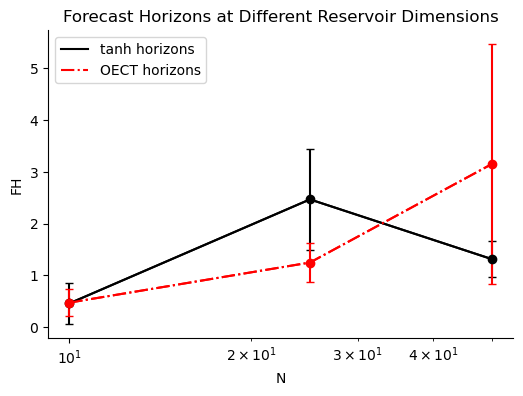

In [17]:
with shelve.open(f"{datapath}/dims_ensemble/data") as data:
    datadicts = data["dicts"]
    reservoir_dims = data["dims"]
    t = data["time"]

# tolerance = 5 # Forecast horizon tolerance
iterations = 2  # Number of iterations in run_dims.py

OECT_hm = []
tanh_hm = []


# Ensemble begin
for iter in range(iterations):
    OECT_signals = datadicts[iter]["OECT_signals"]
    OECT_predictions = datadicts[iter]["OECT_predictions"]
    tanh_signals = datadicts[iter]["tanh_signals"]
    tanh_predictions = datadicts[iter]["tanh_predictions"]

    OECT_horizons = []
    tanh_horizons = []

    for i in range(len(reservoir_dims)):
        OECT_signal = OECT_signals[i]
        OECT_prediction = OECT_predictions[i]

        j = 0
        while (
            np.sqrt(np.sum(np.square(OECT_signal[j] - OECT_prediction[j]))) <= tolerance
        ):
            j += 1
        OECT_horizons.append(t[j])

        tanh_signal = tanh_signals[i]
        tanh_prediction = tanh_predictions[i]

        j = 0
        while (
            np.sqrt(np.sum(np.square(tanh_signal[j] - tanh_prediction[j]))) <= tolerance
        ):
            j += 1
        tanh_horizons.append(t[j])

    OECT_hm.append(OECT_horizons)
    tanh_hm.append(tanh_horizons)

OECT_hm = np.array(OECT_hm).T

print(OECT_hm)

OECT_means = [np.average(OECT_hm[i]) for i in range(OECT_hm.shape[0])]
OECT_stds = [np.std(OECT_hm[i]) for i in range(OECT_hm.shape[0])]

tanh_hm = np.array(tanh_hm).T

tanh_means = [np.average(tanh_hm[i]) for i in range(tanh_hm.shape[0])]
tanh_stds = [np.std(tanh_hm[i]) for i in range(tanh_hm.shape[0])]


# Ensemble end

plt.figure(figsize=(6, 4))
plt.title("Forecast Horizons at Different Reservoir Dimensions")
plt.plot(reservoir_dims, tanh_means, "k-", label="tanh horizons")
plt.errorbar(
    reservoir_dims, tanh_means, yerr=tanh_stds, fmt="k-", marker="o", capsize=3
)
plt.plot(reservoir_dims, OECT_means, "r-.", label="OECT horizons")
plt.errorbar(
    reservoir_dims, OECT_means, yerr=OECT_stds, fmt="r-.", marker="o", capsize=3
)
plt.ylabel("FH")
plt.xlabel("N")
plt.xscale("log")
sns.despine()
plt.legend()

#### Horizon v Pinchoff

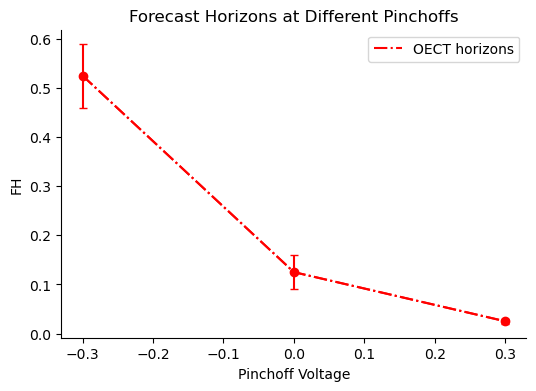

In [6]:
with shelve.open(f"{datapath}/pinchoffs_ensemble/data") as data:
    datadicts = data["dicts"]
    pinchoffs = data["pinchoffs"]
    t = data["time"]

# tolerance = 5  # Forecast horizon tolerance
iterations = 2  # Number of iterations in run_pinchoffs.py

OECT_hm = []
tanh_hm = []

# Ensemble begin
for iter in range(iterations):
    OECT_signals = datadicts[iter]["OECT_signals"]
    OECT_predictions = datadicts[iter]["OECT_predictions"]

    OECT_horizons = []

    for i in range(len(pinchoffs)):
        p = pinchoffs[i]

        OECT_signal = OECT_signals[i]
        OECT_prediction = OECT_predictions[i]

        j = 0
        while (
            np.sqrt(np.sum(np.square(OECT_signal[j] - OECT_prediction[j]))) <= tolerance
        ):
            j += 1
        OECT_horizons.append(t[j])

    OECT_hm.append(OECT_horizons)

OECT_hm = np.array(OECT_hm).T

OECT_means = [np.average(OECT_hm[i]) for i in range(OECT_hm.shape[0])]
OECT_stds = [np.std(OECT_hm[i]) for i in range(OECT_hm.shape[0])]


# Ensemble end

plt.figure(figsize=(6, 4))
plt.title("Forecast Horizons at Different Pinchoffs")
plt.plot(pinchoffs, OECT_means, "r-.", label="OECT horizons")
plt.errorbar(pinchoffs, OECT_means, yerr=OECT_stds, fmt="r-.", marker="o", capsize=3)
plt.ylabel("FH")
plt.xlabel("Pinchoff Voltage")
sns.despine()
plt.legend()

#### Horizon v Sparsity

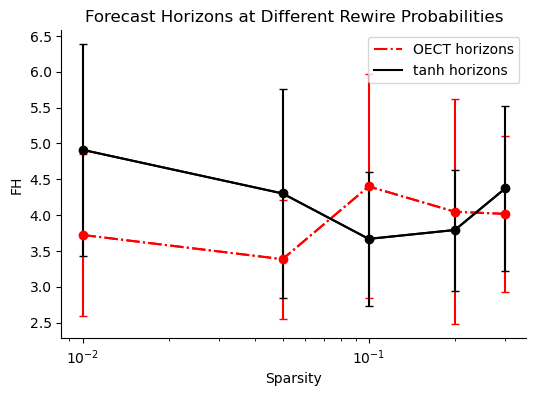

In [18]:
with shelve.open(f"{datapath}/sparse_ensemble/data") as data:
    datadicts = data["dicts"]
    sparsities = data["sparsities"]
    t = data["time"]

# tolerance = 5  # Forecast horizon tolerance
iterations = 10  # Number of iterations in run_pinchoffs.py

OECT_hm = []
tanh_hm = []

# Ensemble begin
for iter in range(iterations):
    OECT_signals = datadicts[iter]["OECT_signals"]
    OECT_predictions = datadicts[iter]["OECT_predictions"]
    tanh_signals = datadicts[iter]["tanh_signals"]
    tanh_predictions = datadicts[iter]["tanh_predictions"]

    OECT_horizons = []
    tanh_horizons = []

    for i in range(len(sparsities)):
        p = sparsities[i]

        OECT_signal = OECT_signals[i]
        OECT_prediction = OECT_predictions[i]

        j = 0
        while (
            np.sqrt(np.sum(np.square(OECT_signal[j] - OECT_prediction[j]))) <= tolerance
        ):
            j += 1
        OECT_horizons.append(t[j])

        tanh_signal = tanh_signals[i]
        tanh_prediction = tanh_predictions[i]

        j = 0
        while (
            np.sqrt(np.sum(np.square(tanh_signal[j] - tanh_prediction[j]))) <= tolerance
        ):
            j += 1
        tanh_horizons.append(t[j])

    OECT_hm.append(OECT_horizons)
    tanh_hm.append(tanh_horizons)

OECT_hm = np.array(OECT_hm).T

OECT_means = [np.average(OECT_hm[i]) for i in range(OECT_hm.shape[0])]
OECT_stds = [np.std(OECT_hm[i]) for i in range(OECT_hm.shape[0])]

tanh_hm = np.array(tanh_hm).T

tanh_means = [np.average(tanh_hm[i]) for i in range(tanh_hm.shape[0])]
tanh_stds = [np.std(tanh_hm[i]) for i in range(tanh_hm.shape[0])]


# Ensemble end

plt.figure(figsize=(6, 4))
plt.title("Forecast Horizons at Different Rewire Probabilities")
plt.plot(sparsities[1:], OECT_means[1:], "r-.", label="OECT horizons")
plt.errorbar(
    sparsities[1:], OECT_means[1:], yerr=OECT_stds[1:], fmt="r-.", marker="o", capsize=3
)
plt.plot(sparsities[1:], tanh_means[1:], "k-", label="tanh horizons")
plt.errorbar(
    sparsities[1:], tanh_means[1:], yerr=tanh_stds[1:], fmt="k-", marker="o", capsize=3
)
plt.ylabel("FH")
plt.xlabel("Sparsity")
plt.xscale("log")
sns.despine()
plt.legend()

#### Horizon v $\alpha$

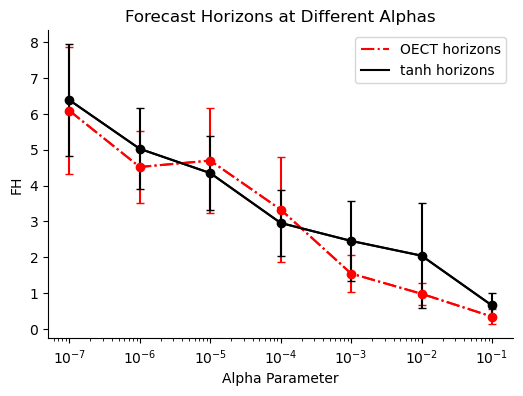

In [8]:
with shelve.open(f"{datapath}/alpha_ensemble/data") as data:
    datadicts = data["dicts"]
    alphas = data["alphas"]
    t = data["time"]

# tolerance = 5  # Forecast horizon tolerance
iterations = 10  # Number of iterations in run_pinchoffs.py

OECT_hm = []
tanh_hm = []

# Ensemble begin
for iter in range(iterations):
    OECT_signals = datadicts[iter]["OECT_signals"]
    OECT_predictions = datadicts[iter]["OECT_predictions"]
    tanh_signals = datadicts[iter]["tanh_signals"]
    tanh_predictions = datadicts[iter]["tanh_predictions"]

    OECT_horizons = []
    tanh_horizons = []

    for i in range(len(alphas)):
        p = alphas[i]

        OECT_signal = OECT_signals[i]
        OECT_prediction = OECT_predictions[i]

        j = 0
        while (
            np.sqrt(np.sum(np.square(OECT_signal[j] - OECT_prediction[j]))) <= tolerance
        ):
            j += 1
        OECT_horizons.append(t[j])

        tanh_signal = tanh_signals[i]
        tanh_prediction = tanh_predictions[i]

        j = 0
        while (
            np.sqrt(np.sum(np.square(tanh_signal[j] - tanh_prediction[j]))) <= tolerance
        ):
            j += 1
        tanh_horizons.append(t[j])

    OECT_hm.append(OECT_horizons)
    tanh_hm.append(tanh_horizons)

OECT_hm = np.array(OECT_hm).T

OECT_means = [np.average(OECT_hm[i]) for i in range(OECT_hm.shape[0])]
OECT_stds = [np.std(OECT_hm[i]) for i in range(OECT_hm.shape[0])]

tanh_hm = np.array(tanh_hm).T

tanh_means = [np.average(tanh_hm[i]) for i in range(tanh_hm.shape[0])]
tanh_stds = [np.std(tanh_hm[i]) for i in range(tanh_hm.shape[0])]


# Ensemble end

plt.figure(figsize=(6, 4))
plt.title("Forecast Horizons at Different Alphas")
plt.plot(alphas, OECT_means, "r-.", label="OECT horizons")
plt.errorbar(alphas, OECT_means, yerr=OECT_stds, fmt="r-.", marker="o", capsize=3)
plt.plot(alphas, tanh_means, "k-", label="tanh horizons")
plt.errorbar(alphas, tanh_means, yerr=tanh_stds, fmt="k-", marker="o", capsize=3)
plt.ylabel("FH")
plt.xlabel("Alpha Parameter")
plt.xscale("log")
sns.despine()
plt.legend()